In [ ]:
import cv2
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA (Exploratory Data Analysis)
El Análisis Exploratorio de Datos (EDA) representa una fase crucial en cualquier proyecto de Inteligencia Artificial.

## Análisis de la base

La base cuenta con 2,906 imágenes.

In [ ]:
#Función para cargar y mostrar la imagen
def load_and_display_image(image_id):
    image_path = f"/content/drive/MyDrive/Redes Neuronales/Proyecto/data/img ({image_id}).jpg"
    img = cv2.imread(image_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2_imshow(img_rgb)

        height, width, _ = img.shape
        print(f"Dimensiones de la imagen {image_id}: {width} x {height}")
    else:
        print(f"Error: No se pudo cargar la imagen {image_path}")

# Crear el widget de deslizador
image_slider = widgets.IntSlider(min=1, max=2906, step=1, description='ID de Imagen:', continuous_update=False)

# Mostrat la imagen
output = widgets.interactive_output(load_and_display_image, {'image_id': image_slider})

# Mostrar el widget de deslizador
display(image_slider, output)

IntSlider(value=1, continuous_update=False, description='ID de Imagen:', max=2906, min=1)

Output()

Al echar un vistazo entre las imágenes, se observa la mayoría tiene tamaño 1080 x 1440. Recorreremos todas las imágenes para realizar un histograma del alto y otro histograma del ancho de las imágenes.

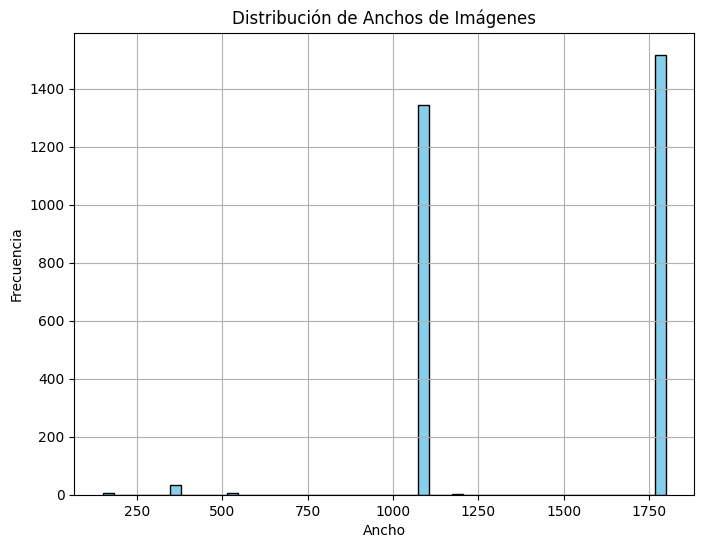

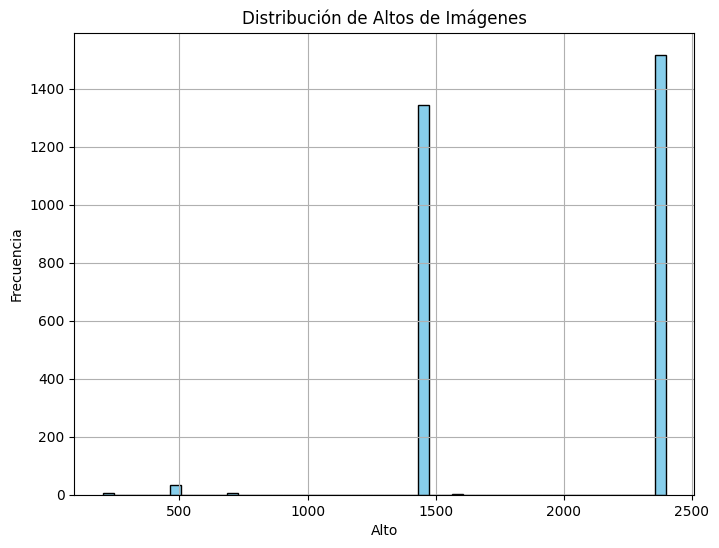

In [ ]:
def calculate_image_dimensions(directory, num_images):
    widths = []
    heights = []

    for i in range(1, num_images + 1):
        filename = f"img ({i}).jpg"
        filepath = os.path.join(directory, filename)

        if os.path.exists(filepath):
            img = cv2.imread(filepath)
            if img is not None:
                height, width, _ = img.shape
                widths.append(width)
                heights.append(height)
        else:
            print(f"Advertencia: No se encontró la imagen {filename}")

    return widths, heights

def plot_histogram(data, title, xlabel):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=50, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Directorio
directory = "/content/drive/MyDrive/Redes Neuronales/Proyecto/data"

# Obtener anchos y altos de todas las imágenes
widths, heights = calculate_image_dimensions(directory, 2906)

# Mostrar histograma del ancho de las imágenes
plot_histogram(widths, 'Distribución de la anchura de las imágenes', 'Ancho')

# Mostrar histograma del alto de las imágenes
plot_histogram(heights, 'Distribución de la altura de las imágenes', 'Alto')

Vamos a redimensionar todas las imágenes para que tengan un tamaño de 128 x 128.

In [ ]:
def resize_images(directory, num_images, target_width, target_height):
    for i in range(1, num_images + 1):
        filename = f"img ({i}).jpg"
        filepath = os.path.join(directory, filename)

        if os.path.exists(filepath):
            img = cv2.imread(filepath)
            if img is not None:
                # Redimensionar
                resized_img = cv2.resize(img, (target_width, target_height))
                # Sobrescribir
                cv2.imwrite(filepath, resized_img)
                print(f"Imagen {filename} redimensionada y guardada con éxito.")
            else:
                print(f"Error: No se pudo cargar la imagen {filename}")
        else:
            print(f"Advertencia: No se encontró la imagen {filename}")

directory = "/content/drive/MyDrive/Redes Neuronales/Proyecto/data"

# Nuevas dimensiones
target_width = 128
target_height = 128

# Redimensionar todas las imágenes
resize_images(directory, 2906, target_width, target_height)

Imagen img (1).jpg redimensionada y guardada con éxito.
Imagen img (2).jpg redimensionada y guardada con éxito.
Imagen img (3).jpg redimensionada y guardada con éxito.
Imagen img (4).jpg redimensionada y guardada con éxito.
Imagen img (5).jpg redimensionada y guardada con éxito.
Imagen img (6).jpg redimensionada y guardada con éxito.
Imagen img (7).jpg redimensionada y guardada con éxito.
Imagen img (8).jpg redimensionada y guardada con éxito.
Imagen img (9).jpg redimensionada y guardada con éxito.
Imagen img (10).jpg redimensionada y guardada con éxito.
Imagen img (11).jpg redimensionada y guardada con éxito.
Imagen img (12).jpg redimensionada y guardada con éxito.
Imagen img (13).jpg redimensionada y guardada con éxito.
Imagen img (14).jpg redimensionada y guardada con éxito.
Imagen img (15).jpg redimensionada y guardada con éxito.
Imagen img (16).jpg redimensionada y guardada con éxito.
Imagen img (17).jpg redimensionada y guardada con éxito.
Imagen img (18).jpg redimensionada y gua

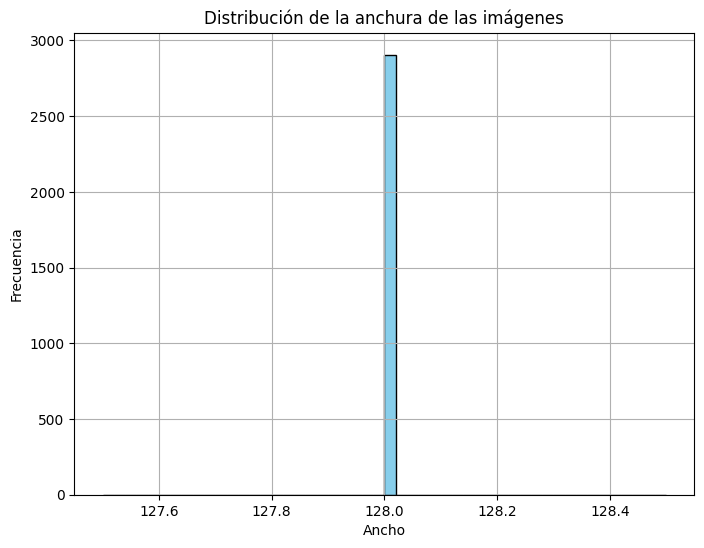

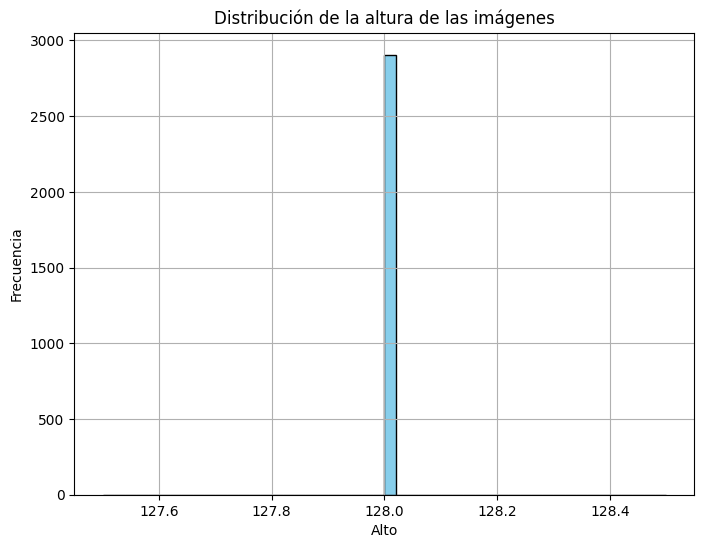

In [ ]:
def calculate_image_dimensions(directory, num_images):
    widths = []
    heights = []

    for i in range(1, num_images + 1):
        filename = f"img ({i}).jpg"
        filepath = os.path.join(directory, filename)

        if os.path.exists(filepath):
            img = cv2.imread(filepath)
            if img is not None:
                height, width, _ = img.shape
                widths.append(width)
                heights.append(height)
        else:
            print(f"Advertencia: No se encontró la imagen {filename}")

    return widths, heights

def plot_histogram(data, title, xlabel):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=50, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Directorio
directory = "/content/drive/MyDrive/Redes Neuronales/Proyecto/data"

# Obtener anchos y altos de todas las imágenes
widths, heights = calculate_image_dimensions(directory, 2906)

# Mostrar histograma del ancho de las imágenes
plot_histogram(widths, 'Distribución de la anchura de las imágenes', 'Ancho')

# Mostrar histograma del alto de las imágenes
plot_histogram(heights, 'Distribución de la altura de las imágenes', 'Alto')